In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import env
import acquire as a
import clustering_functions as cf

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Clustering with the Iris Dataset

1) Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

3) How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

1) Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.


In [26]:
def sql_iris_data():
    sql_query = '''
                select * 
                from measurements
                join species using(species_id)
                '''
    df = pd.read_sql(sql_query, env.get_connection('iris_db'))
    return df

In [27]:
iris = sql_iris_data()

In [28]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [29]:
seed = 123
train, val_test = train_test_split(iris,train_size=.7, random_state=seed)

In [30]:
train.shape, val_test.shape

((105, 7), (45, 7))

In [31]:
#sepal_width and sepal_length

X = iris[['sepal_width' , 'sepal_length']]
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.625     , 0.22222222],
       [0.41666667, 0.16666667],
       [0.5       , 0.11111111],
       [0.45833333, 0.08333333],
       [0.66666667, 0.19444444],
       [0.79166667, 0.30555556],
       [0.58333333, 0.08333333],
       [0.58333333, 0.19444444],
       [0.375     , 0.02777778],
       [0.45833333, 0.16666667],
       [0.70833333, 0.30555556],
       [0.58333333, 0.13888889],
       [0.41666667, 0.13888889],
       [0.41666667, 0.        ],
       [0.83333333, 0.41666667],
       [1.        , 0.38888889],
       [0.79166667, 0.30555556],
       [0.625     , 0.22222222],
       [0.75      , 0.38888889],
       [0.75      , 0.22222222],
       [0.58333333, 0.30555556],
       [0.70833333, 0.22222222],
       [0.66666667, 0.08333333],
       [0.54166667, 0.22222222],
       [0.58333333, 0.13888889],
       [0.41666667, 0.19444444],
       [0.58333333, 0.19444444],
       [0.625     , 0.25      ],
       [0.58333333, 0.25      ],
       [0.5       , 0.11111111],
       [0.

In [32]:

#fit kmeans algo to columns then predict
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

iris['clustering'] = kmeans.predict(X)


In [33]:
iris.clustering

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    2
147    1
148    1
149    2
Name: clustering, Length: 150, dtype: int32

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

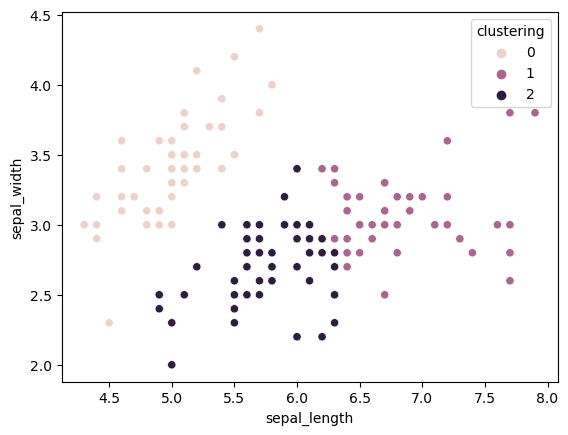

In [34]:
#viz clusters
cluster_1 = sns.scatterplot(x = iris.sepal_length, y = iris.sepal_width, hue = iris.clustering)
cluster_1

1) continued
- Use the elbow method to visually select a good value for k.

from curriculum:

"One way to choose the ideal number of clusters using inertia is the elbow method. To use the elbow method, we'll visualize the inertia against our choice in number of clusters. In this visualization, we'll look for the "elbow" of the curve, or the point where adding additional clusters doesn't give us as big of a reduction in inertia."

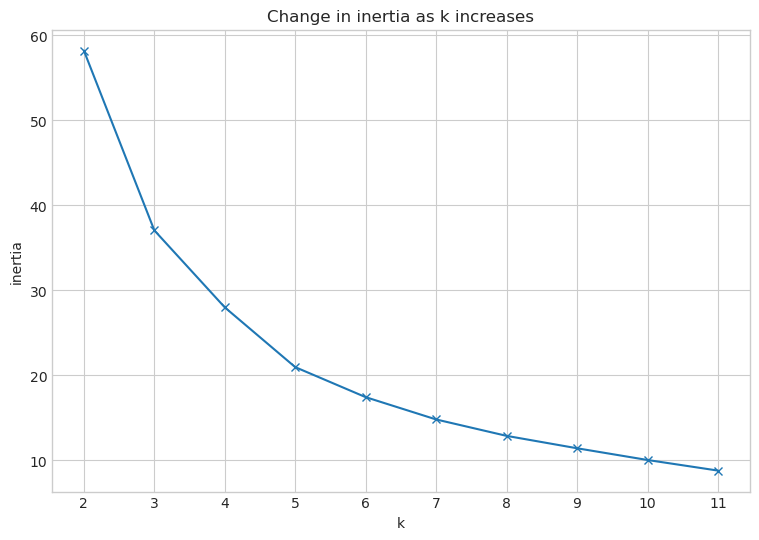

In [35]:
# need to get the inertia
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


I would select 3 as a good value of k

1) continued
- Repeat the clustering, this time with 3 different features.

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 114 to 109
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species_id      105 non-null    int64  
 1   measurement_id  105 non-null    int64  
 2   sepal_length    105 non-null    float64
 3   sepal_width     105 non-null    float64
 4   petal_length    105 non-null    float64
 5   petal_width     105 non-null    float64
 6   species_name    105 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 6.6+ KB


In [37]:
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
114,3,115,5.8,2.8,5.1,2.4,virginica
136,3,137,6.3,3.4,5.6,2.4,virginica
53,2,54,5.5,2.3,4.0,1.3,versicolor
19,1,20,5.1,3.8,1.5,0.3,setosa
38,1,39,4.4,3.0,1.3,0.2,setosa


In [38]:
# petal_length and petal_width
# petal_length and sepal_length
# sepal_length and petal_width

In [39]:
# petal_length and petal_width

X_2= iris[['petal_length' , 'petal_width']]

#fit kmeans algo to columns then predict
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_2)

iris['clustering_2'] = kmeans.predict(X_2)



<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

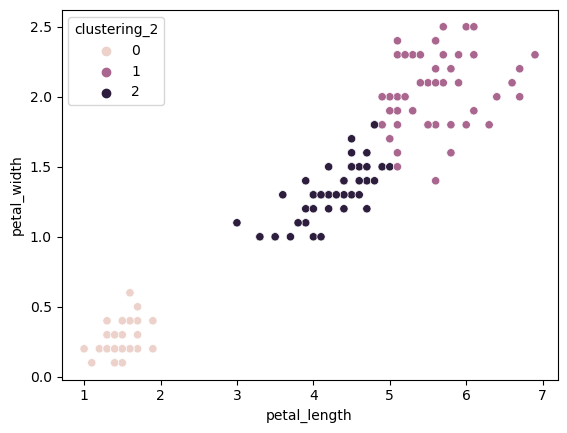

In [40]:
X_2_plot = sns.scatterplot(x = iris.petal_length, y = iris.petal_width, hue = iris.clustering_2)
X_2_plot

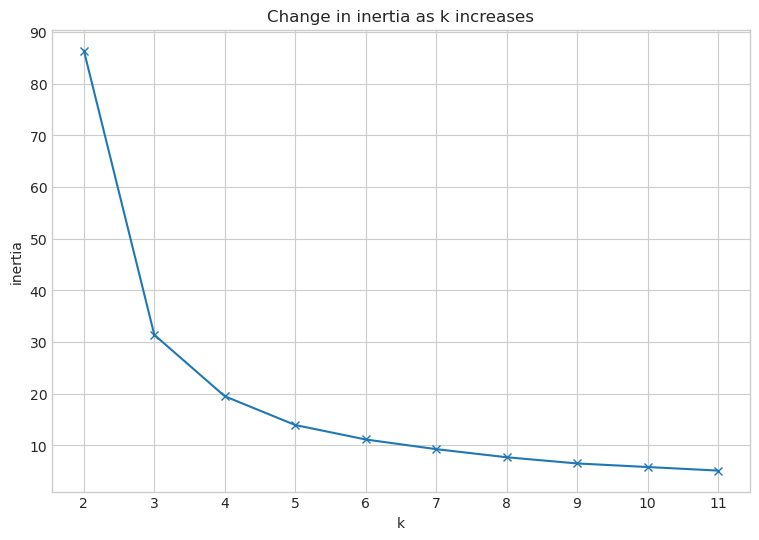

In [41]:
# need to get the inertia
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_2).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


I would select 3 again as a good value for k

In [42]:
# petal_length and sepal_length

X_3= iris[['petal_length' , 'sepal_length']]

#fit kmeans algo to columns then predict
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_3)

iris['clustering_3'] = kmeans.predict(X_3)



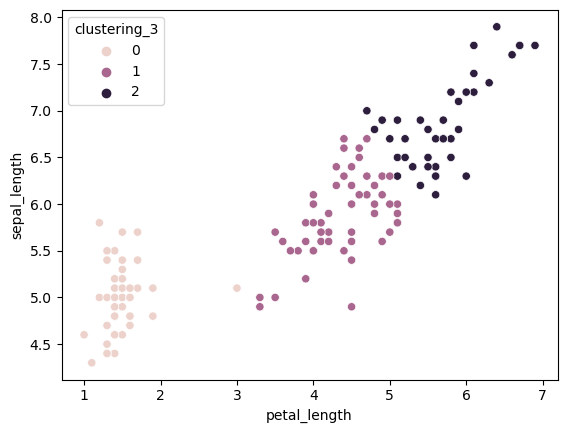

In [43]:
X_3_plot = sns.scatterplot(x = iris.petal_length, y = iris.sepal_length, hue = iris.clustering_3)

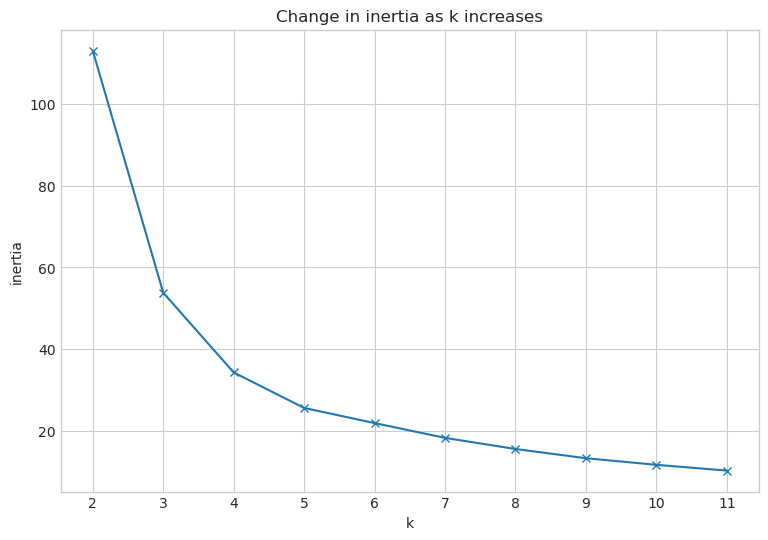

In [44]:
# need to get the inertia
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_3).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


still choosing 3

In [45]:
# sepal_length and petal_width

X_4 = iris[['sepal_length' , 'petal_width']]

#fit kmeans algo to columns then predict
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X_4)

iris['clustering_4'] = kmeans.predict(X_4)




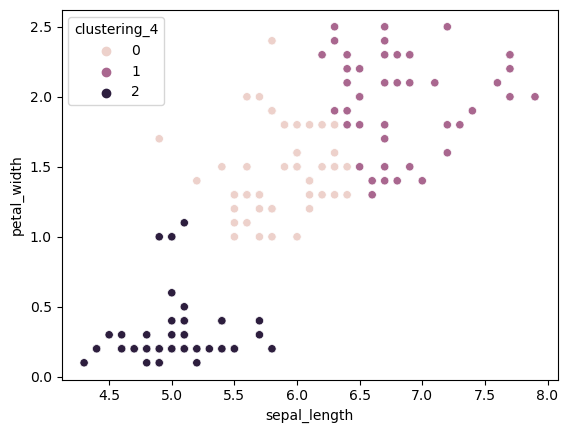

In [46]:
X_4_plot = sns.scatterplot(x = iris.sepal_length, y = iris.petal_width, hue = iris.clustering_4)

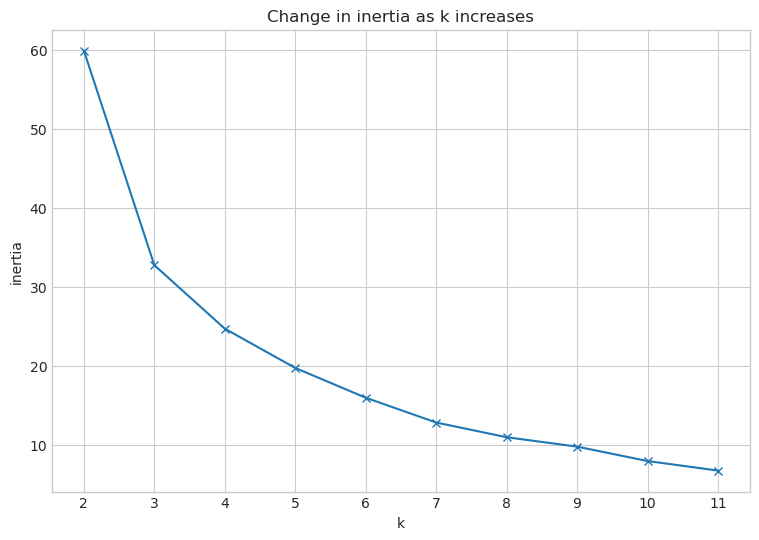

In [47]:
# need to get the inertia
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_4).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


still choosing 3 as best value for k

2) Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!


In [48]:
#use plot_cluster_inertia_k function to explore the mall_customers dataset

#first, acquire the data

def sql_mall_data():
    sql_query = """
               select * from customers
                """
    df = pd.read_sql(sql_query, env.get_connection('mall_customers'))
    return df

In [49]:
mall = sql_mall_data()

In [50]:
mall.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


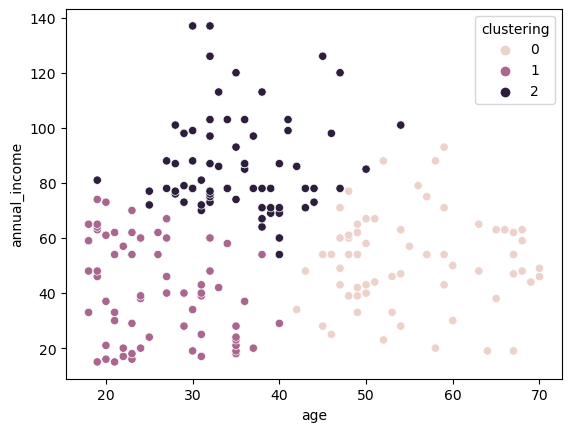

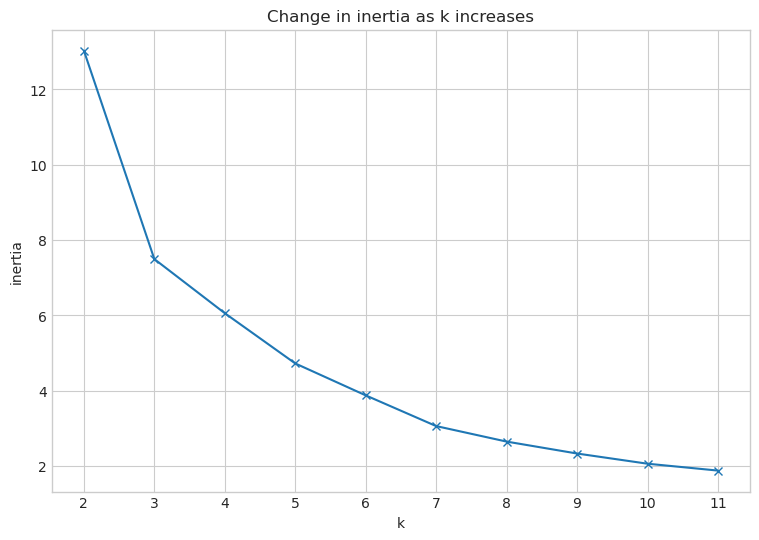

In [52]:
cf.plot_cluster_inertia_k(mall, 'age' , 'annual_income')


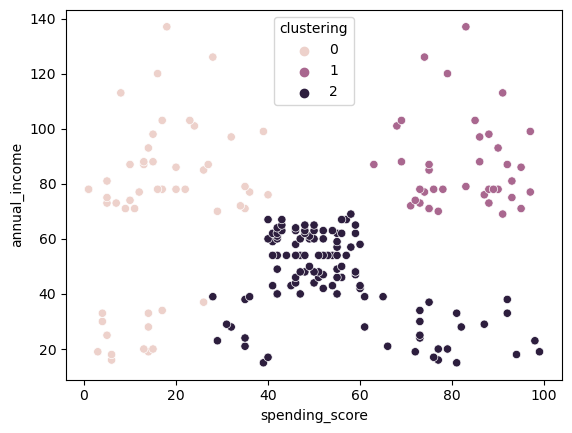

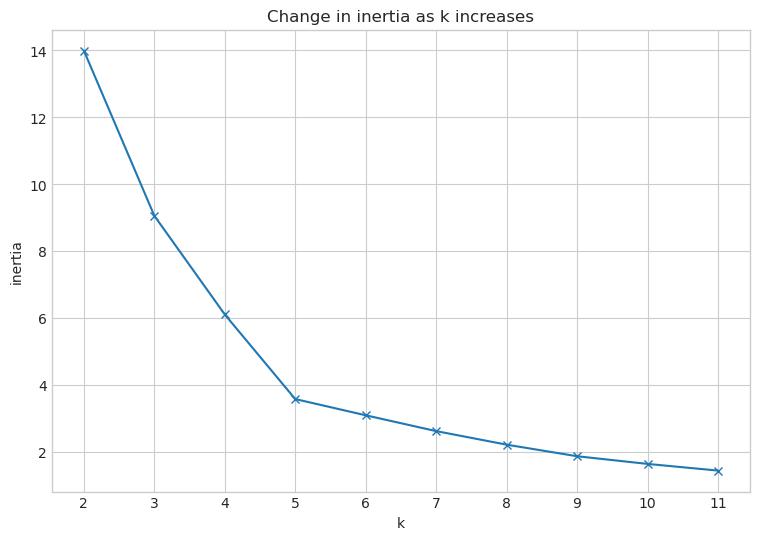

In [53]:
cf.plot_cluster_inertia_k(mall, 'spending_score' , 'annual_income')


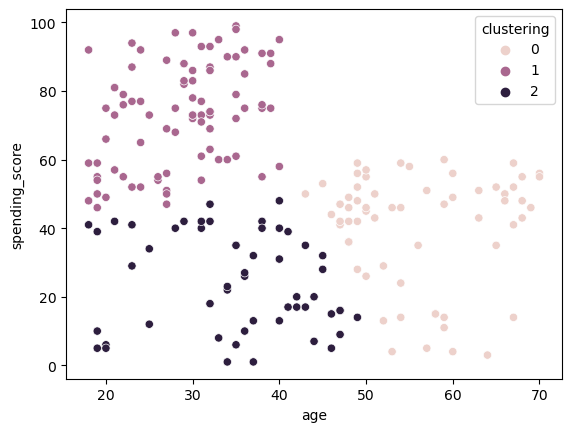

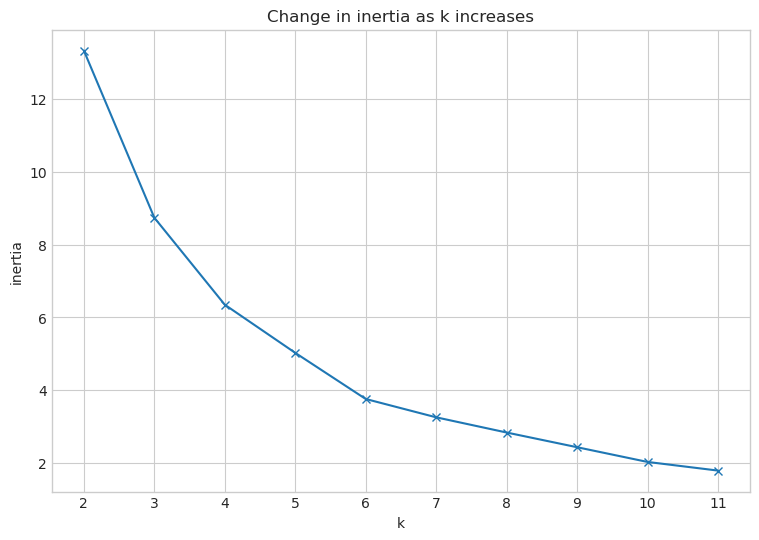

In [54]:
cf.plot_cluster_inertia_k(mall, 'age' , 'spending_score')


3) How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [ ]:
#compare scaled vs unscaled

In [55]:
def plot_unscaled_cluster_inertia_k(train, col1, col2):

#initialize variable to be reference later, taking in arguments for features/columns

    X = train[[col1, col2]]

#scaling
    scaler = MinMaxScaler()
    X= scaler.fit_transform(X)

#fit KMeans algo
    kmeans = KMeans(n_clusters = 3)
    kmeans.fit(X)

#assign predictions to original dataframe
    train['clustering'] = kmeans.predict(X)

#plot cluster predictions, take in argument for column of predictions
    sns.scatterplot(x = train[col1], y = train[col2], hue = train['clustering'])

#plot inertia over k increasing, take in argument for column of predictions
    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(9, 6))
        pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
        plt.xticks(range(2, 12))
        plt.xlabel('k')
        plt.ylabel('inertia')
        plt.title('Change in inertia as k increases')

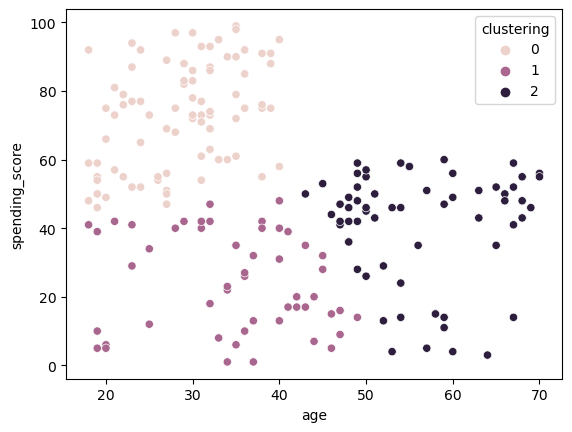

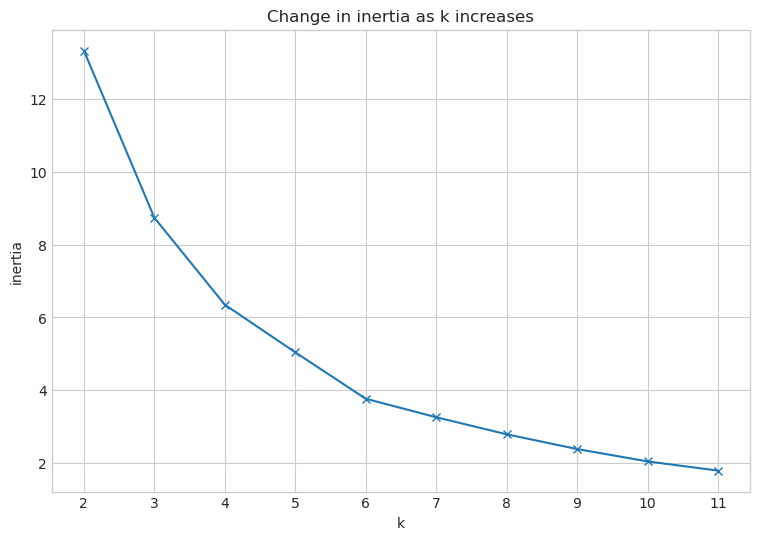

In [56]:
#unscaled
plot_unscaled_cluster_inertia_k(mall, 'age' , 'spending_score')

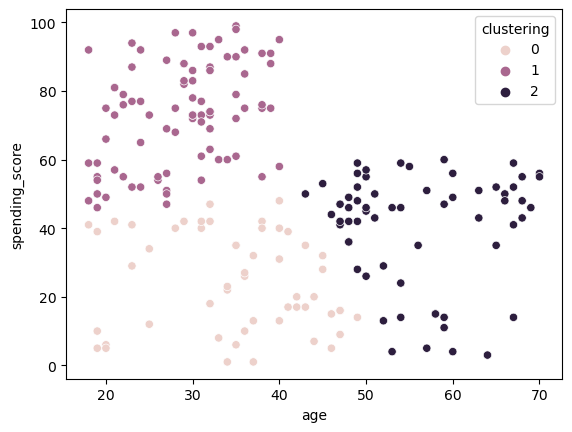

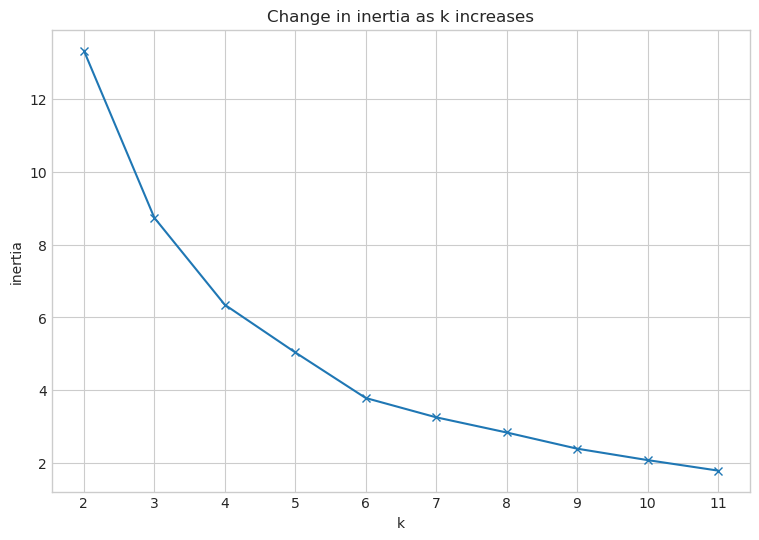

In [57]:
#scaled
cf.plot_cluster_inertia_k(mall, 'age' , 'spending_score')